# Part (d): Correlation
### UE22CS342AA2 - Data Analytics 
- Karthik Namboori - namkarthik2003@gmail.com
- `Correlation` is a measure of the strength and direction of linear relationship between two random variables in other words it is a measure of the association between two variables.
- Correlation is a descriptive statistic that lies in the range of `(-1,1)`
- There are different types of correlation coefficients, based on the nature of the data being compared:
    - Between two continuous (interval, ratio) random variables - Pearson’s Product Moment Correlation Coefficient
    - Between two ordinal random variables - Spearman-Rank Correlation Coefficient
    - Between a continuous RV and a dichotomous RV - Point Bi-Serial Correlation Coefficient
    - Between two binary random variables - Phi Coefficient
    
    
    
- Problems
    - Problem 1
    - Problem 2
    - Problem 3
    - Problem 4
    - Problem 5
    - Problem 6


# About The Dataset

- The dataset is a summary of various health and disease related statistics of various countries and the effect the economy has on the health status (or maybe not). Below is the description of each column of the dataset.

1. **SlNo**: Serial Number – A unique identifier for each record.
2. **Country**: Name of the country where the data was collected.
3. **Year**: Year in which the data was recorded (Ranges from 2001 to 2004).
4. **Status**: Development status of the country (e.g., Developing, Developed).
5. **Life_Expectancy**: Average life expectancy at birth in years.
6. **Tuberculosis**: Number of tuberculosis cases per 100,000 people.
7. **Influenza**: Number of influenza cases per 100,000 people.
8. **Adult_Mortality**: Number of adult deaths (per 1,000) between ages 15 and 60.
9. **Infant_Deaths**: Number of infant deaths.
10. **Alcohol**: Per capita alcohol consumption (in liters).
11. **Percentage_Expenditure**: Expenditure on health as a percentage of Gross Domestic Product per capita(%)
12. **Hepatitis_B**: Number of Hepatitis B cases per 100,000 people.
13. **Measles**: Number of measles cases per 100,000 people.
14. **Under_Five_Deaths**: Number of under-five deaths per 1000 population
15. **Polio**: Number of polio cases per 100,000 people
16. **Total_Expenditure**: General government expenditure on health as a percentage of total government expenditure (%).
17. **Diphtheria**: Percentage of children vaccinated against diphtheria.
18. **HIV_AIDS**: Number of HIV/AIDS cases per 100,000 people.
19. **GDP**: Gross Domestic Product (per capita).
20. **Population**: Total population of the country.
21. **Thinness_1_19_Years**: Prevalence of thinness among children and adolescents for Age 10 to 19 (%).
22. **Thinness_5_9_Years**: Prevalence of thinness among children for Age 5 to 9(%)
23. **Income_Composition_Of_Resources**: Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
24. **Schooling**: Number of years of Schooling(years).

*Snippet to install a package cleanly*
```
if (!requireNamespace("tidyverse", quietly = TRUE)) {
    install.packages("tidyverse")
}
```
*Load a package*

```
library(tidyverse)
```


In [1]:
# loading the dataset - Upload the dataset under the input tab
data <- read.csv("/kaggle/input/health/health_dataset_final.csv", header=TRUE)
head(data)


,SlNo,Country,Year,Status,Life_Expectancy,Tuberculosis,Influenza,Adult_Mortality,Infant_Deaths,Alcohol,⋯,Polio,Total_Expenditure,Diphtheria,HIV_AIDS,GDP,Population,Thinness_1_19_Years,Thinness_5_9_Years,Income_Composition_Of_Resources,Schooling
,<int>,<chr>,<int>,<chr>,<dbl>,<int>,<int>,<dbl>,<int>,<dbl>,⋯,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,Country05,2003,Underdeveloped,77.16019,3910,1472,36.39507,423,12.20242,⋯,27,17505.116,6,955,18.39563,28144543,3.76500,0.45819,0.55455,14.72448
2,1,Country10,2003,Developed,82.28994,0,23,66.22373,5,10.99064,⋯,0,4251.203,9,27,17.54163,6050171,0.89575,1.45698,0.61181,15.51517
3,2,Country10,2002,Developed,82.05777,0,24,69.23985,0,10.17807,⋯,0,4565.410,9,29,17.63363,5632647,0.86146,1.49045,0.60963,15.53737
4,3,Country17,2003,Developed,70.05283,0,33,62.10910,6,12.08233,⋯,0,23157.863,1,16,18.44411,26350783,0.08313,0.89904,0.52659,19.88090
5,4,Country17,2001,Developed,60.89178,0,28,65.78880,0,10.94226,⋯,0,18921.097,1,14,14.67308,21914346,0.07738,0.84822,0.49020,18.75125
6,5,Country04,2001,Developed,70.41779,0,12,65.02133,0,5.79869,⋯,0,15493.781,8,10,16.96856,8066324,1.94223,5.72457,0.43829,18.85327


*Problem 1*

Across the year 2002, find the total number of airborne disease cases in each of the countries in a greatest first order. (1 point)

In [3]:
data_2002 <- subset(data,Year==2002)
data_2002$Total_airborneDisease <-data_2002$Tuberculosis + data_2002$Influenza + data_2002$Measles
Sorted2002<- data_2002[order(-data_2002$Total_airborneDisease),]
Req_data <- Sorted2002[,c("Country","Total_airborneDisease")]
Req_data

,Country,Total_airborneDisease
,<chr>,<int>
50,Country14,1846046
52,Country12,60626
62,Country19,55701
10,Country08,47875
13,Country16,44356
60,Country07,35198
28,Country13,32582
38,Country03,29151
59,Country05,28846


*Problem 2*

For the year 2001, what is the strength of relation between alcohol consumption and life expectancy and in what direction? State any issues with this if present. How will you rectify it. Submit observations after resolution and justify the changes. `(HINT: Do analyse the scatter plot. Retain the changes made for the following problems.)` (2 points)

[1] -0.6299247


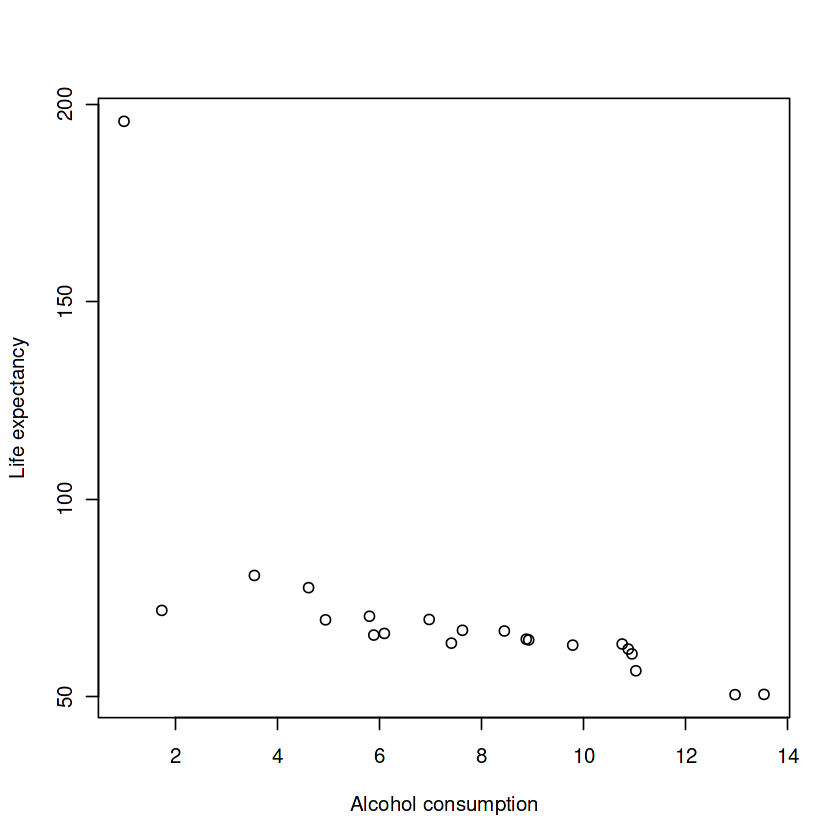

In [7]:
year_2001 <- subset(data, Year==2001)
plot(year_2001$Alcohol, year_2001$Life_Expectancy, 
    xlab = "Alcohol consumption",
    ylab = "Life expectancy")
print(cor(year_2001$Alcohol, year_2001$Life_Expectancy,use= "complete.obs"))

*Problem 3*

Convert the Tuberculosis column of countries in 2001 to a binary column based on the presence or absence of tuberculosis cases. Calculate the point-biserial correlation between the binary tuberculosis column and the life expectancy column. (2 points)

In [8]:
if (!requireNamespace("tidyverse", quietly = TRUE)) {
    install.packages("tidyverse")
}
library(tidyverse)

data_2001 <- data %>% filter(Year == 2001)

data_2001 <- data_2001 %>% 
  mutate(Tuberculosis_Binary = ifelse(Tuberculosis > 0, 1, 0))

correlation_result <- cor.test(data_2001$Tuberculosis_Binary, data_2001$Life_Expectancy, method = "pearson")

correlation_result

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ ggplot2   3.5.1     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors



	Pearson's product-moment correlation

data:  data_2001$Tuberculosis_Binary and data_2001$Life_Expectancy
t = 0.57716, df = 19, p-value = 0.5706
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.3184697  0.5327611
sample estimates:
     cor 
0.131263 


*Problem 4*

Estimate the phi coefficient correlation between the occurrence of infant deaths and the presence of polio cases in 2001. Convert the two columns into a contingency table. (2 points)

The Phi-coefficient is given by:
$$
\phi = \frac{n_{11} \cdot n_{00} - n_{10} \cdot n_{01}}{\sqrt{n_{X1} \cdot n_{X0} \cdot n_{Y1} \cdot n_{Y0}}}
$$
used to find the strength of relation between 2 binary variables, where in the following representations hold:
- **n11**: Number of cases where \( X = 1 \) and \( Y = 1 \).
- **n00**: Number of cases where \( X = 0 \) and \( Y = 0 \).
- **n10**: Number of cases where \( X = 1 \) and \( Y = 0 \).
- **n01**: Number of cases where \( X = 0 \) and \( Y = 1 \).

- **nX1**: Total number of cases where \( X = 1 \). 
- **nX0**: Total number of cases where \( X = 0 \). 
- **nY1**: Total number of cases where \( Y = 1 \). 
- **nY0**: Total number of cases where \( Y = 0 \). 


In [12]:
Polio <- ifelse(year_2001$Polio==0,0,1)
Infant_Deaths <- ifelse(year_2001$Infant_Deaths==0,0,1)
contingency_table <- table(Polio,Infant_Deaths)
contingency_table
i<- contingency_table[1,1] 
j <-contingency_table[1,2] 
k <- contingency_table[2,1]
l <- contingency_table[2,2]

phi<- (i * l - j * k) / sqrt((i + j) * (k + l) * (i + k) * (j + l))
print(phi)

     Infant_Deaths
Polio  0  1
    0  7  3
    1  1 10

[1] 0.6264145


*Problem 5*

Calculate the Spearman-Rank correlation coefficient between the two sets of ranks, Life Expectancy and GDP, to explore the relationship between the same during the year 2001. (Rank the countries based on life expectancy and GDP, assigning a rank of 1 to the country with the highest value in each category.)  Now, statistically infer whether this correlation is significant at `α = 0.05`, and test the hypothesis that the correlation coefficient is `at least 0.35.` (2 points)

In [13]:
year_2001$Life_Expectancy_Rank <- rank(-year_2001$Life_Expectancy)
year_2001$GDP_sorted <-rank(-year_2001$GDP)
spearman <- cor.test(year_2001$Life_Expectancy_Rank,year_2001$GDP_sorted,method="spearman", alternative="greater")
spearman


	Spearman's rank correlation rho

data:  year_2001$Life_Expectancy_Rank and year_2001$GDP_sorted
S = 182, p-value = 7.208e-07
alternative hypothesis: true rho is greater than 0
sample estimates:
      rho 
0.8818182 


*Problem 6*

`A report mentions a significant decline in the U.S. healthcare outcomes between the 1990s and 2010s, using data from life expectancy and disease prevalence. Contributors of the report utilized words such as “crisis” to describe the current state of the healthcare system at the time. It was an imminent call to action for reformation.` What are your thoughts on this? Was it truly due to the decline in the quality of the healthcare system? (1 point)
- Your task is to explore answers given by different Large Language Models (Optionally, as a bonus, you can test out open-source models via local inference! You can find a few @[huggingface](https://huggingface.co/models?sort=trending) here) or Small LM or Quantised Models.
- Which gave the best results? Why do you think so?

In [ ]:
#The decline in U.S healthcare outcomes can be linked to healthcare system quality, economic factors, lifestyle changes, population changes (aged population) are contributing factors to this change.

*fin*